# [Research Request - Service Data for SJCOG #1476](https://github.com/cal-itp/data-analyses/issues/1476)

explore trying to answer these questions from the issue:

>- share some information from NTD on what % of services are provided by SJRTD.
>- see if NTD can help us tell what each operators need is for that region.
>- see if NTD shows you the operations just in a particular UZA. 
>- Are you able to see specifically within the Tracy boundaries which percentage of service is provided by City of Tracy vs SJRTD?
>- Can NTD tell you the funding for each operator by source?
>- Can you tell what level of 5307, 5311, TDA, LCTOP etc they [operators?] get from there?

Found that [FTA publishes resources and tables related to apportionments](https://www.transit.dot.gov/funding/apportionments/apportionment-resources), including [the data used to calculate apportionments for multiple formula grant programs (5307, STIC, 5311, etc)](https://www.transit.dot.gov/funding/apportionments/formula-apportionments-data). 

Specifially, the data in [National Transit Database Data Used for the Small Transit Intensive Cities (STIC) Apportionments](https://www.transit.dot.gov/funding/apportionments/national-transit-database-data-used-small-transit-intensive-cities-stic) may help answer these questions as it displays the metrics (UPT, VRM, VRH etc) useed to calculate apportionments.


In [1]:
import altair as alt
import pandas as pd
from calitp_data_analysis.tables import tbls
from siuba import _, collect, count, filter, group_by, select, show_query, summarize

# from update_vars import GCS_FILE_PATH, NTD_MODES, NTD_TOS

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
import geopandas as gpd
import gcsfs
import google.auth

credentials, project = google.auth.default()
fs = gcsfs.GCSFileSystem(token=credentials)

In [ ]:
# list Cities in San Joaquin County
sj_cities = [
    "Stockton",
    "Escalon",
    "Tracy",
    "Lathrop",
    "Lodi",
    "Manteca",
    "Mountain House",
    "Ripon",
    "Acampo",
    "French Camp",
    "Garden Arcres",
]

[Table 3. FY 2025 Section 5307 and 5340 Urbanized Area Formula Appropriations (Full Year)](https://www.transit.dot.gov/funding/apportionments/table-3-fy-2025-section-5307-and-5340-urbanized-area-formula-0)
confirms the total apportionment dollars for the SJCOG region sent by Wendy. 
<br>Note: Pivot Tables were used to transform the excel data.
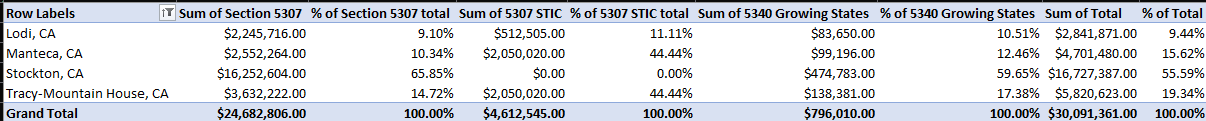

[Table 6. FY 2025 Section 5307 Small Transit Intensive Cities Apportionments (Full Year)](https://www.transit.dot.gov/funding/apportionments/table-6-fy-2025-section-5307-small-transit-intensive-cities-apportionments-0) 
display the 5307 STIC apportionments for the regions (this tabled does not include Stockton UZA)
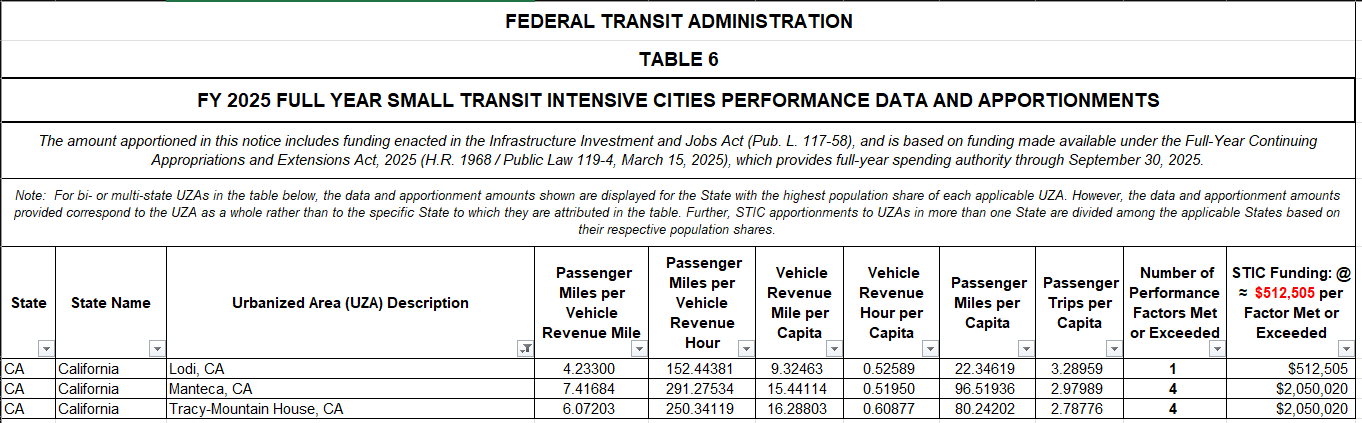

## 1. See if NTD can help us tell what each operators need is for that region.

Need some clarity on what `need` means in this context.

## 2. see if NTD shows you the operations just in a particular UZA.
[National Transit Database Data Used for the Small Transit Intensive Cities (STIC) Apportionments](https://www.transit.dot.gov/funding/apportionments/national-transit-database-data-used-small-transit-intensive-cities-stic). shows the data use to calculate the apportionment of STIC funds for 2025 by uza and/or agency 

Below is the `STIC Apportionment` tab filtered by the UZAs in the  SJ region
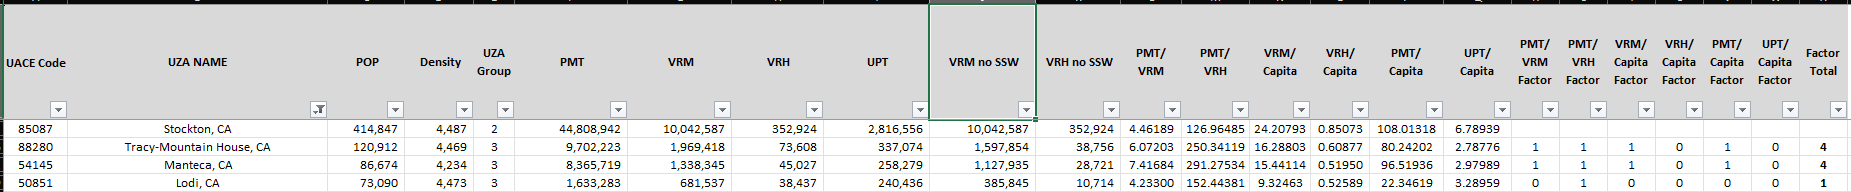

below is the `STIC by Agency` tab filtered by the UZAs in the SJ region. This tab excludes Stockton UZA
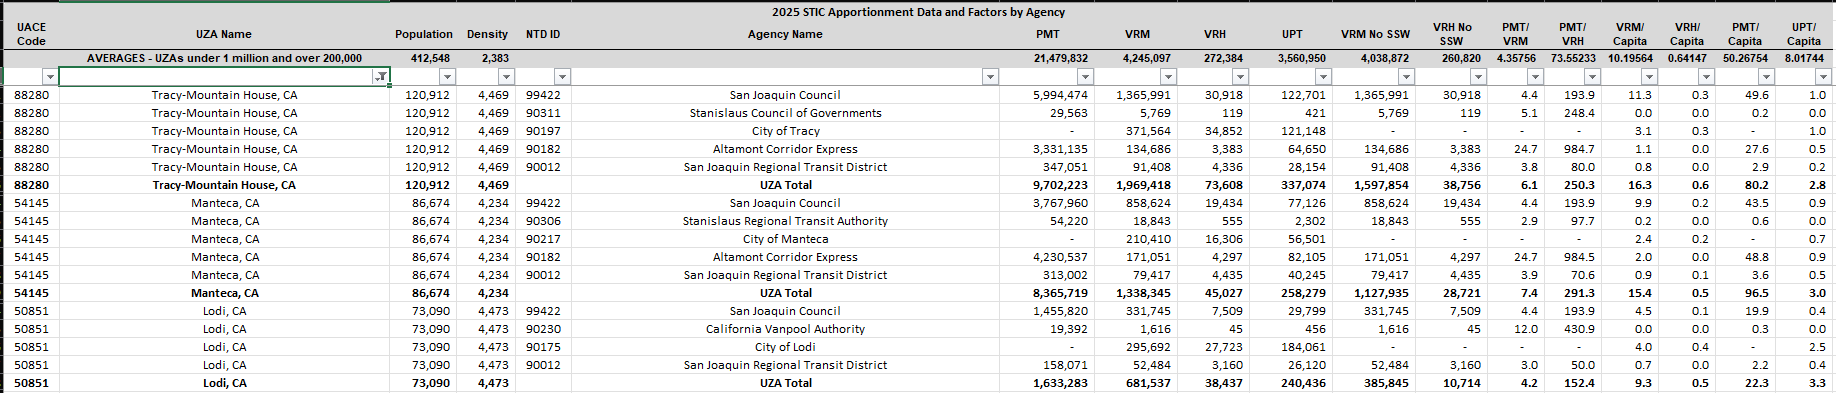

The [National Transit Database Data Used for the Section 5307 Urbanized Area Formula and Section 5339 Bus Formula Apportionments](https://www.transit.dot.gov/funding/apportionments/national-transit-database-data-used-section-5307-urbanized-area-formula-and) displays the operations for Stockton UZA
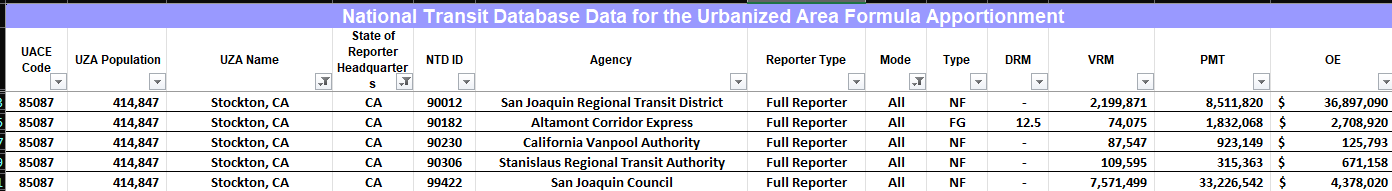


## 3. Are you able to see specifically within the Tracy boundaries which percentage of service is provided by City of Tracy vs SJRTD?
[National Transit Database Data Used for the Small Transit Intensive Cities (STIC) Apportionments](https://www.transit.dot.gov/funding/apportionments/national-transit-database-data-used-small-transit-intensive-cities-stic), shows service metrics used for apportionment calculation. 

Below is a pivot table showing the % of service metrics for `City of Tracy` vs `SJRTD` in the Tracy UZA
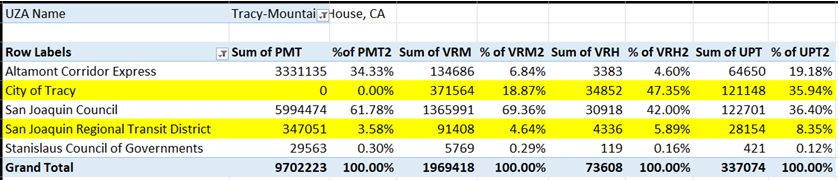


## 4. Can NTD tell you the funding for each operator by source?
## & 
## 5. Can you tell what level of 5307, 5311, TDA, LCTOP etc they [operators?] get from there?
FTA has 2 datasets for federal and state funding for agencies:

- [2022 - 2023 NTD Annual Data - Funding Sources (Federal)](https://data.transportation.gov/Public-Transit/2022-2023-NTD-Annual-Data-Funding-Sources-Federal-/qpjk-b3zw/about_data) 
- [2022 - 2023 NTD Annual Data - Funding Sources (State)](https://data.transportation.gov/Public-Transit/2022-2023-NTD-Annual-Data-Funding-Sources-State-/dd43-h6wv/about_data)

Federal table can tell us the amount of 5307 (urbanized area funds) and 5311 funds go to each operator for 2022-2023. However, the state table does not display specific funding names.

In [ ]:
# equivilent to"2022 - 2023 NTD Annual Data - Funding Sources (Federal)" 
# https://data.transportation.gov/Public-Transit/2022-2023-NTD-Annual-Data-Funding-Sources-Federal-/qpjk-b3zw/about_data
fund_source_fed = (
    tbls.mart_ntd_annual_reporting.fct_funding_sources_federal()
    >> filter(
        _.state == "CA",
        _.city.isin(sj_cities)

    )
    >> group_by(
        _.agency_name, 
        _.ntd_id, 
        _.reporter_type, 
        _.uza_name,
        _.city
    )
    >> summarize(
        total_5309_funds=_.fta_capital_program_5309.sum(),
        total_5311_funds=_.fta_rural_progam_5311.sum(),
        total_urbanized_area_funds=_.fta_urbanized_area_formula.sum(),
    )
    >> collect()
)

In [ ]:
fund_source_fed

In [ ]:
# equivilent to "https://data.transportation.gov/Public-Transit/2022-2023-NTD-Annual-Data-Funding-Sources-State-/dd43-h6wv/about_data"

fund_source_state = (
    tbls.mart_ntd_annual_reporting.fct_funding_sources_state()
    >> filter(
        _.state == "CA",
        _.city.isin(sj_cities)

    )
    >> group_by(
        _.agency_name, 
        _.ntd_id, 
        _.reporter_type, 
        _.uza_name,
        _.city
    )
    >> summarize(
        total_gen_funds=_.general_funds.sum(),
        total_transportation_funds=_.transportation_funds.sum(),
        total_reduced_reporter_funds=_.reduced_reporter_funds.sum(),
    )
    >> collect()
)

In [ ]:
fund_source_state

---

## Transit Service Intensity

In [3]:
tsi_url = "gs://calitp-analytics-data/data-analyses/transit_service_intensity/test_tsi_statewide_2025-04-16.geojson"

In [ ]:
tsi_data = gpd.read_file(
    tsi_url,
    storage_options={"token": credentials.token}
)

In [7]:
from calitp_data_analysis import *
fs = get_fs()
with fs.open(tsi_url) as f:
    tsi_data=gpd.read_file(f)

In [8]:
tsi_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 7394 entries, 0 to 7393
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   tract            7394 non-null   object  
 1   pop_sq_mi        7394 non-null   float64 
 2   population       7394 non-null   int64   
 3   daily_vrm_miles  7394 non-null   float64 
 4   daily_vrh_hours  7394 non-null   float64 
 5   geometry         7394 non-null   geometry
dtypes: float64(3), geometry(1), int64(1), object(1)
memory usage: 346.7+ KB


In [16]:
tsi_data.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - California.
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
tsi_data.explore()

In [13]:
# CA Counties
county_url="https://caltrans-gis.dot.ca.gov/arcgis/rest/services/CHboundary/County_Boundaries/FeatureServer/0/query?outFields=*&where=1%3D1&f=geojson"

county_map=gpd.read_file(
    county_url,
    storage_options={"token": credentials.token}
)

In [20]:
display(
    county_map.info(),
    county_map.crs
)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   OBJECTID       58 non-null     int64   
 1   COUNTYFP10     58 non-null     object  
 2   GEOID10        58 non-null     object  
 3   NAME10         58 non-null     object  
 4   ALAND10        58 non-null     int64   
 5   AWATER10       58 non-null     int64   
 6   INTPTLAT10     58 non-null     object  
 7   INTPTLON10     58 non-null     object  
 8   CO_CODE        58 non-null     object  
 9   DISTRICT       58 non-null     object  
 10  Shape__Area    58 non-null     float64 
 11  Shape__Length  58 non-null     float64 
 12  geometry       58 non-null     geometry
dtypes: float64(2), geometry(1), int64(3), object(7)
memory usage: 6.0+ KB


None

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
sj = county_map[county_map["NAME10"]=="San Joaquin"]
sj.explore()

In [21]:
test = sj.overlay(tsi_data.to_crs("EPSG:4326"),how='intersection')

In [22]:
test.explore()